In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_hdf('Data.h5')

In [3]:
letters = 'ABCDEF'
columns = ['610TI903', '610TI904', '610PDI019']

raskoksovka_data = {}
raskoksovka_value = {}
for letter in letters:
    tmp = []
    for name in columns:
        col_name = name + letter
        tmp.append(data[[x for x in data.columns if col_name in x][0]])
    raskoksovka_data[letter] = tmp
    
    raskoksovka_value[letter] = data[[x for x in data.columns if '610FI024'+letter in x][0]]
    

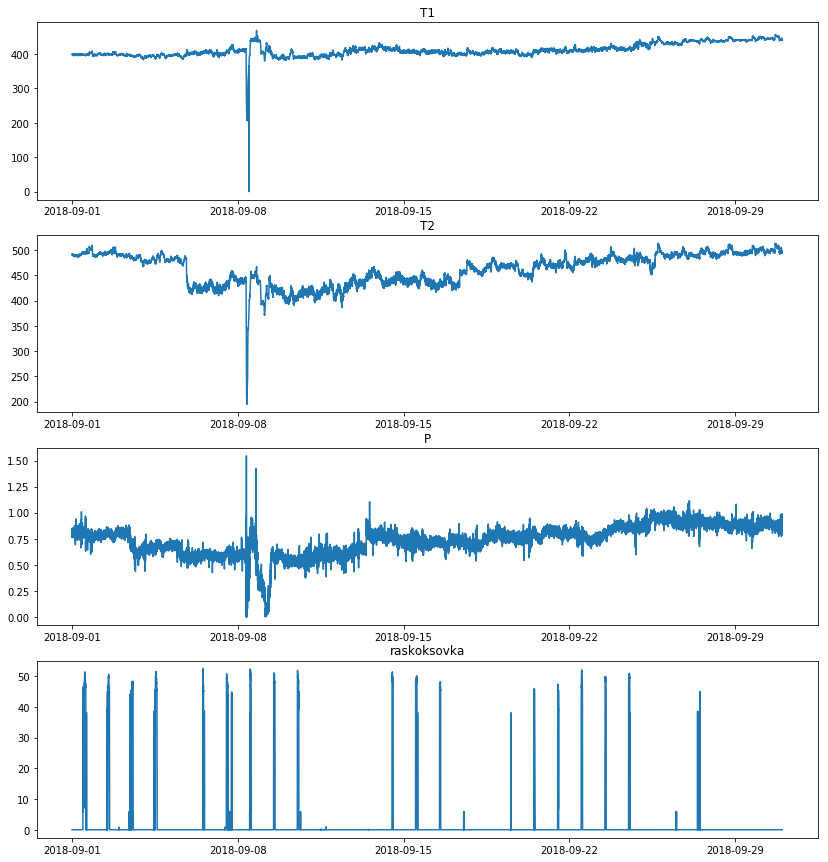

In [4]:
letter = 'B'

plt.figure(figsize=(14,15))
plt.subplot(4,1,1)
plt.title('T1')
plt.plot(data.index, raskoksovka_data[letter][0])

plt.subplot(4,1,2)
plt.title('T2')
plt.plot(data.index, raskoksovka_data[letter][1])

plt.subplot(4,1,3)
plt.title('P')
plt.plot(data.index, raskoksovka_data[letter][2])

plt.subplot(4,1,4)
plt.title('raskoksovka')
plt.plot(data.index, raskoksovka_value[letter])

In [5]:
print(np.sum(raskoksovka_value['B']!=0), np.sum(raskoksovka_value['B']==0))

2384 40816


In [6]:
tmp = raskoksovka_value['B']
nonzero_idx = np.array(tmp.loc[tmp>0].index)
zero_idx = np.random.choice(tmp.loc[tmp==0].index, len(nonzero_idx), replace=False)
index = np.concatenate((nonzero_idx, zero_idx))

In [7]:
y = raskoksovka_value['B'].loc[index]>10
y.head()

DATE AND TIME 
2018-09-01 00:25:00    False
2018-09-01 09:12:00    False
2018-09-01 09:13:00    False
2018-09-01 09:29:00    False
2018-09-01 09:31:00    False
Name: 610FI024B DACA.PV, dtype: bool

In [8]:
X1 = raskoksovka_data['B'][0].loc[index]
X2 = raskoksovka_data['B'][1].loc[index]
X3 = raskoksovka_data['B'][2].loc[index]
X = pd.DataFrame([X1,X2,X3]).T
X.head()

,610TI903B DACA.PV,610TI904B DACA.PV,610PDI019B DACA.PV
DATE AND TIME,,,
2018-09-01 00:25:00,398.716156,490.076447,0.827377
2018-09-01 09:12:00,395.831024,491.328522,0.836080
2018-09-01 09:13:00,395.866669,491.150818,0.831617
2018-09-01 09:29:00,397.281158,491.202911,1.008145
2018-09-01 09:31:00,397.107880,492.563538,0.821563


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [10]:
from sklearn.linear_model import LogisticRegression
c = 10
logreg = LogisticRegression(C=c)
logreg.fit(X_train,y_train)
logreg.score(X_test,y_test)

/home/psyrbin/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.720125786163522

In [11]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=10)
tree.fit(X_train,y_train)
tree.score(X_test,y_test)

0.7955974842767296

In [16]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', C=0.5)
svm.fit(X_train,y_train)
svm.score(X_test,y_test)

/home/psyrbin/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8071278825995807